# Evaluating the Relationship Between Wine Properties and Quality

The primary goal of this analysis was to explore how the quality of wine correlates with its various features and to identify which specific attributes have the most significant influence on wine quality. By analyzing these relationships, I aimed to uncover patterns and insights that could help in understanding the factors that contribute to higher or lower quality wines.

For my project, I utilized the 'Red Wine Quality' dataset from Kaggle, which can be accessed through the following link: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.manifold import TSNE

from sklearn.preprocessing import MinMaxScaler

import numpy as np

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


The dataset doesn't have any missing values, it has 12 columns , 11 columns with features based on physicochemical tests and one column named "quality" is output variable which represents the score between 0 and 10 , based on sensory data.

The quality column contains one of six following scores:

In [6]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

Let's visualize the data using seaborn library, and plot pairwise relationships in a dataset.

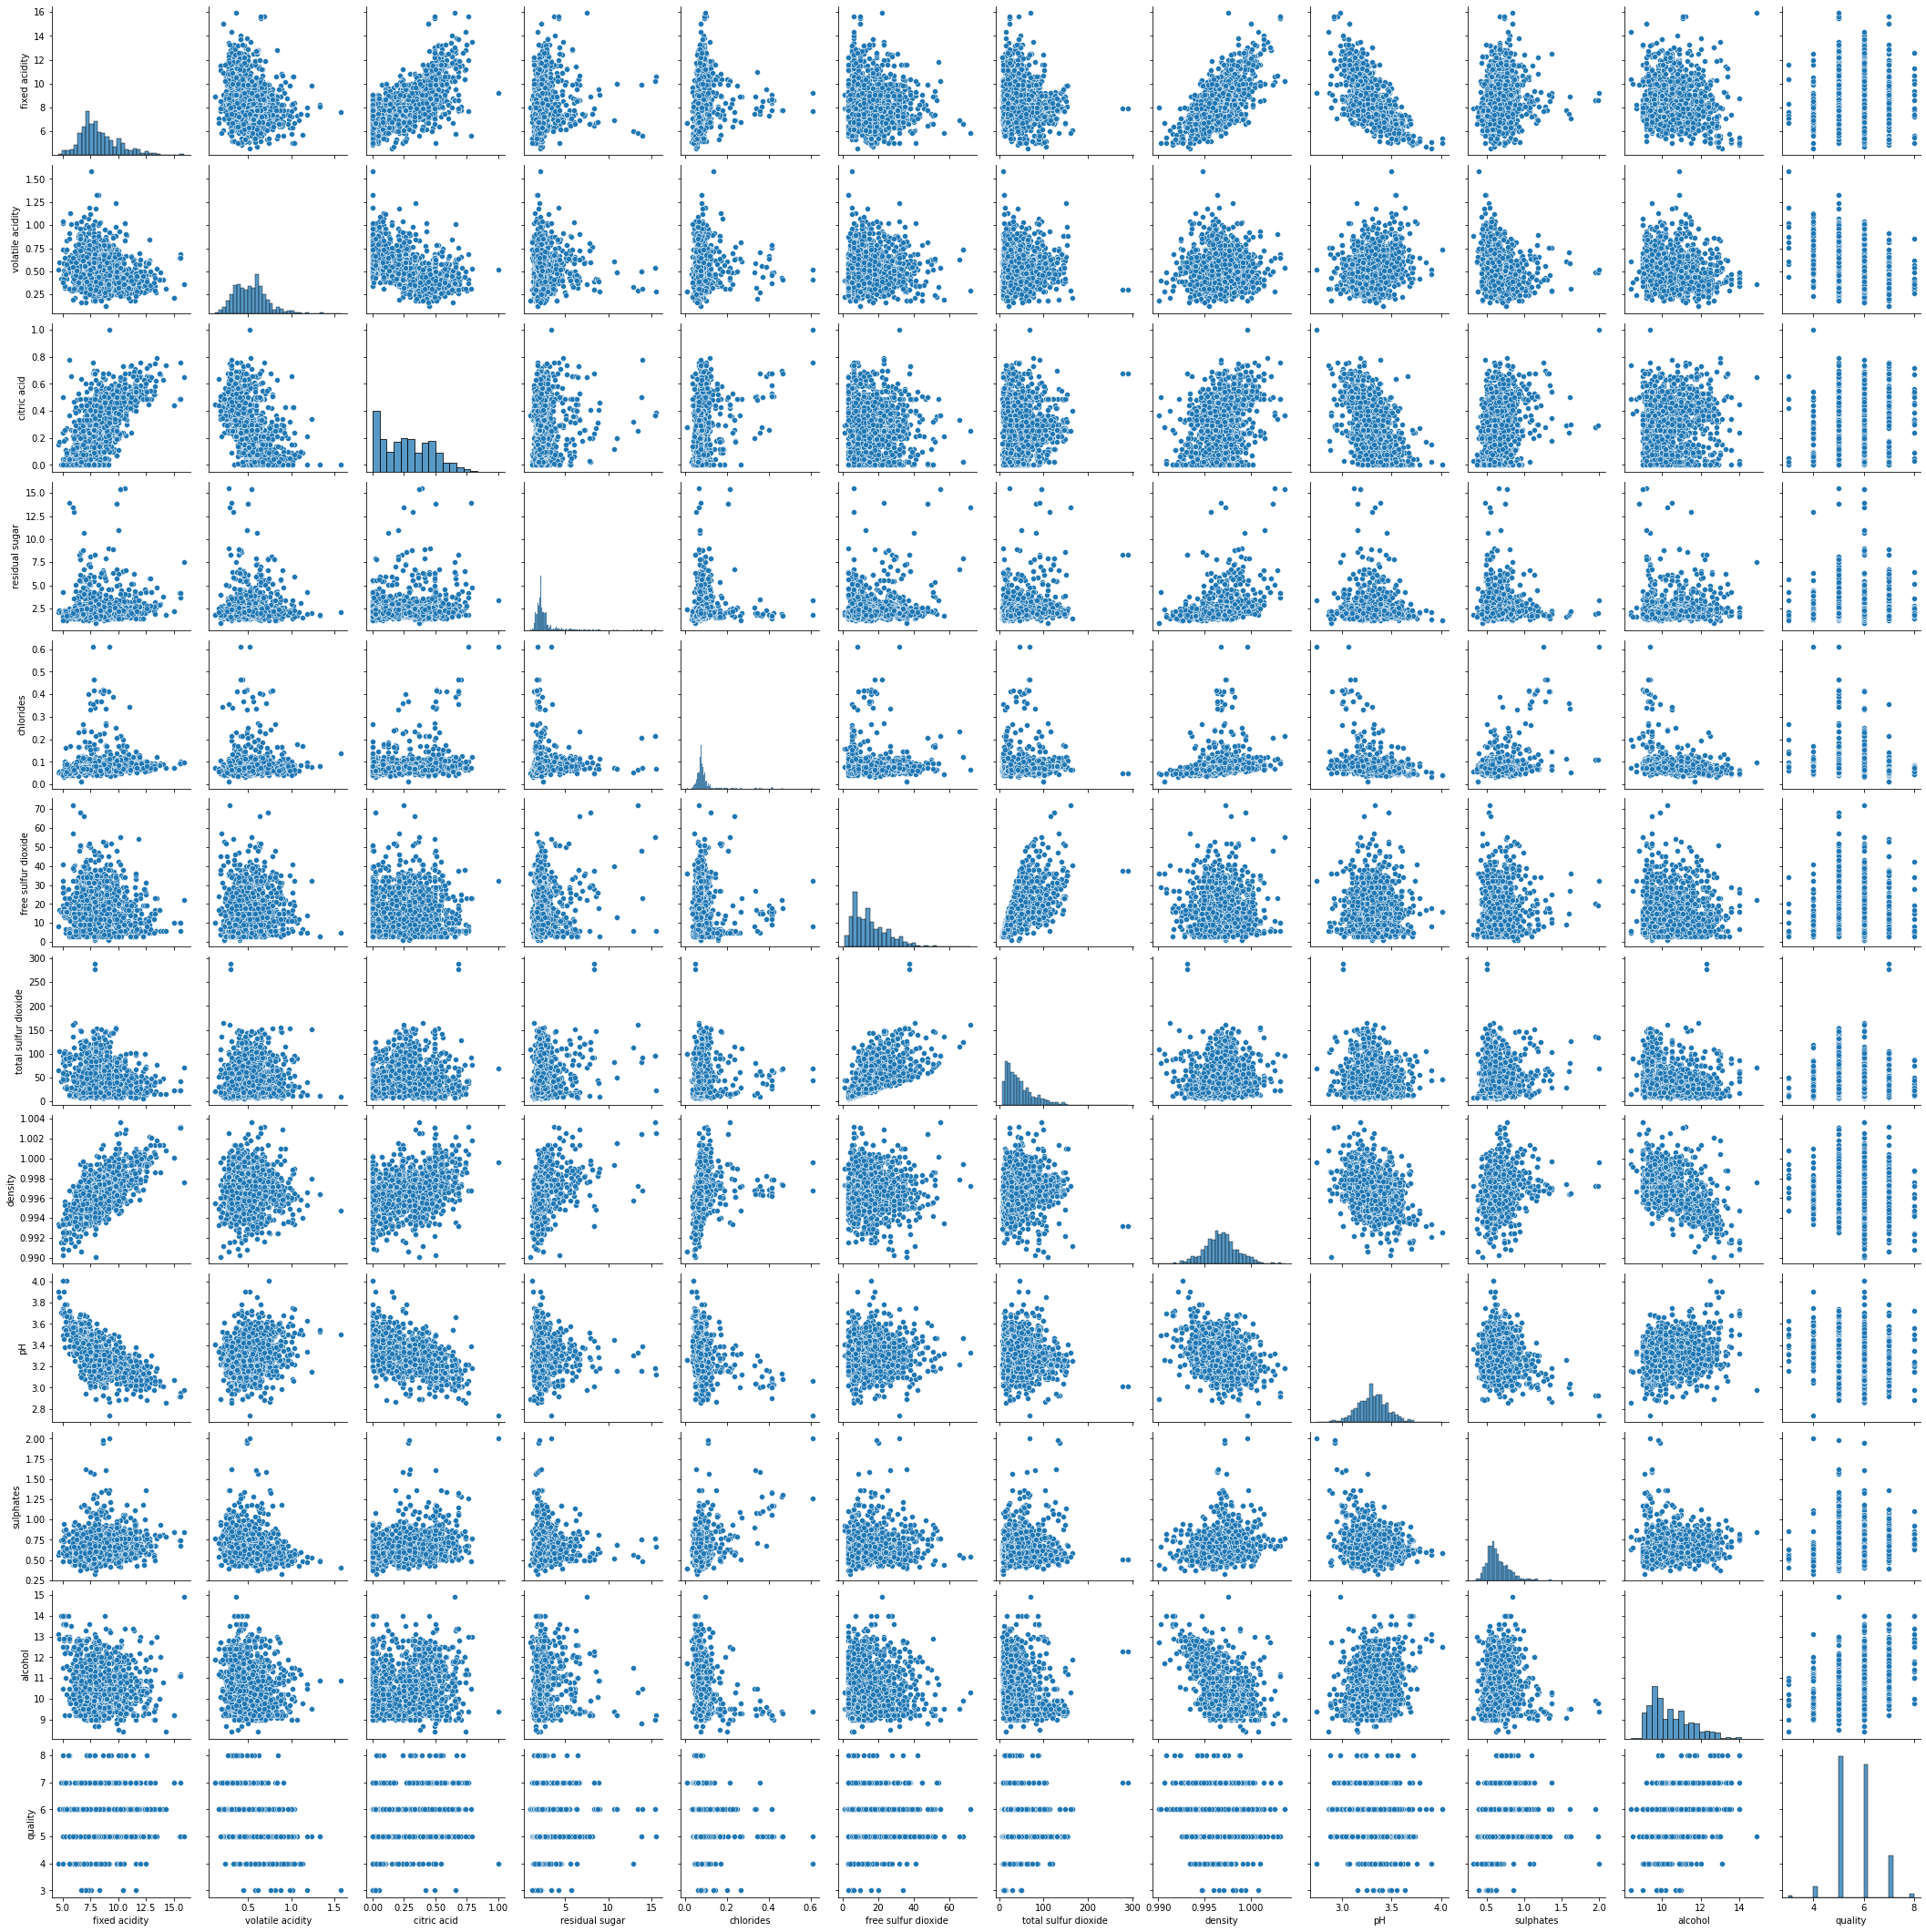

In [7]:
sns.pairplot(df)

At first glance, there appears to be no clear correlation between wine quality and its features.

In our analysis, we plan to use the k-means algorithm to cluster the data. We will set the number of clusters equal to the number of unique scores in the quality column of the dataset. Our hypothesis is that wines within the same cluster will share the same quality score.

We also will use PCA for dimentionality reduction.

In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

We created separate dataframes with feature columns and quality column.

In [9]:
features_as_is = df.drop(columns=['quality'])
quality = df['quality']

We normalized the data in the features column to make PCA results more robust.

In [10]:
# Create a MinMaxScaler instance
scaler = MinMaxScaler()
features = scaler.fit_transform(features_as_is)

features


array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.53543307, 0.25149701,
        0.4       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.65354331, 0.22754491,
        0.27692308],
       [0.12389381, 0.13013699, 0.47      , ..., 0.51181102, 0.19760479,
        0.4       ]])

We are performing PCA.

In [11]:
# Create a PCA object
pca = PCA(n_components=2)

# Fit the PCA model to the normalized data
pca.fit(features)

# Transform data 
features_pca= pca.transform(features)

print(features_pca.shape) 

(1599, 2)


We applied the K-Means algorithm to cluster the data.

In [12]:
# Apply K-Means clustering to pca features
kmeans = KMeans(n_clusters=6, random_state=42)  # Set n_clusters to the desired number of clusters
kmeans.fit(features_pca)

KMeans(n_clusters=6, random_state=42)

We added K-Means cluster labels to the DataFrame to visualize the results.

In [13]:
# Add the K-Means cluster labels to the DataFrame to
features_pca_df = pd.DataFrame(features_pca, columns=[f'PC{i+1}' for i in range(features_pca.shape[1])])
features_pca_df['Cluster'] = kmeans.labels_

# Concatenate the 'quality' column back with the PCA-reduced features and cluster labels
df_final = pd.concat([features_pca_df, quality.reset_index(drop=True)], axis=1)

# Check the shape of the resulting DataFrame
print(df_final.shape)

# Preview the DataFrame
print(df_final.head())

(1599, 4)
        PC1       PC2  Cluster  quality
0 -0.271839 -0.195125        1        5
1 -0.225848 -0.258617        4        5
2 -0.187260 -0.179955        4        5
3  0.422279 -0.031881        3        6
4 -0.271839 -0.195125        1        5


Visualizing clusters

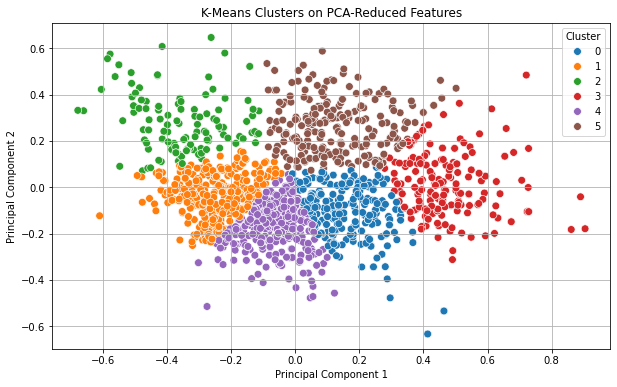

In [14]:
plt.figure(figsize=(10, 6))

# Scatter plot of the first two principal components
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='Cluster', 
    data=features_pca_df, 
    palette='tab10', 
    s=60
)

# Add plot details
plt.title('K-Means Clusters on PCA-Reduced Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Visualising qualities.

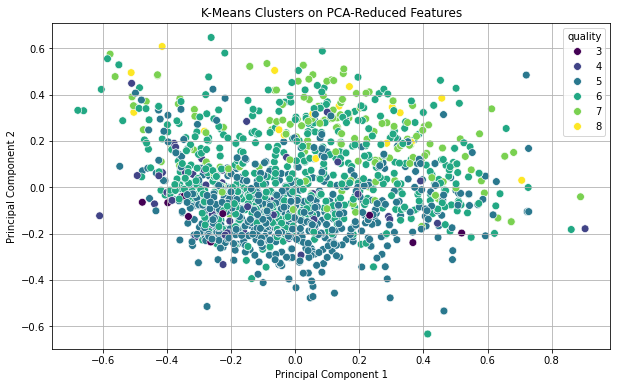

In [15]:
plt.figure(figsize=(10, 6))

# Scatter plot of the first two principal components
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue=quality.reset_index(drop=True), 
    data=features_pca_df, 
    palette='viridis', 
    s=60
)

# Add plot details
plt.title('K-Means Clusters on PCA-Reduced Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='quality')
plt.grid(True)
plt.show()

The results indicate that the data is highly non-linear, and PCA does not effectively separate the clusters. Therefore, we will use the non-linear dimensionality reduction technique, T-SNE.

In [16]:
# Apply t-SNE to reduce dimensions to 2
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200, n_iter=1000)
features_tsne = tsne.fit_transform(features)

# Apply K-Means clustering to the t-SNE-reduced features
kmeans = KMeans(n_clusters=6, random_state=42)  # Adjust n_clusters as needed
kmeans.fit(features_tsne)

# Create a DataFrame for visualization
features_tsne_df = pd.DataFrame(features_tsne, columns=['t-SNE1', 't-SNE2'])
features_tsne_df['Cluster'] = kmeans.labels_
features_tsne_df['quality'] = quality.reset_index(drop=True)

/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


Visualizing clusters

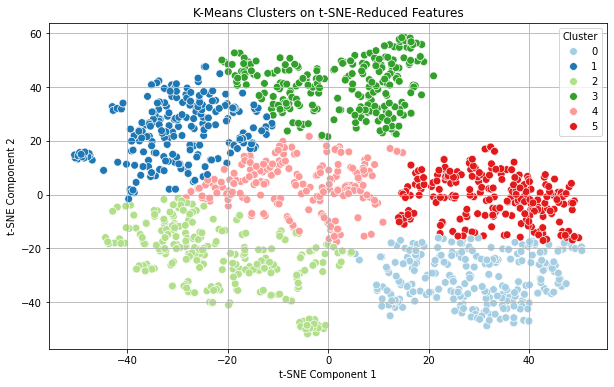

In [17]:
plt.figure(figsize=(10, 6))

# Plot t-SNE-reduced features with clusters as hue
sns.scatterplot(
    x='t-SNE1', 
    y='t-SNE2', 
    hue='Cluster', 
    data=features_tsne_df, 
    palette='Paired', 
    s=60
)

plt.title('K-Means Clusters on t-SNE-Reduced Features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Visualising qualities

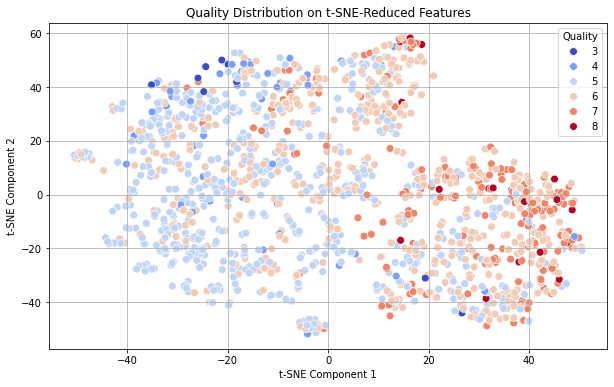

In [18]:
plt.figure(figsize=(10, 6))

# Plot t-SNE-reduced features with quality as hue
sns.scatterplot(
    x='t-SNE1', 
    y='t-SNE2', 
    hue='quality', 
    data=features_tsne_df, 
    palette='coolwarm',  # Adjust palette to suit the data
    s=60
)

plt.title('Quality Distribution on t-SNE-Reduced Features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Quality')
plt.grid(True)
plt.show()

Visualizing the qualities separately for clarity.

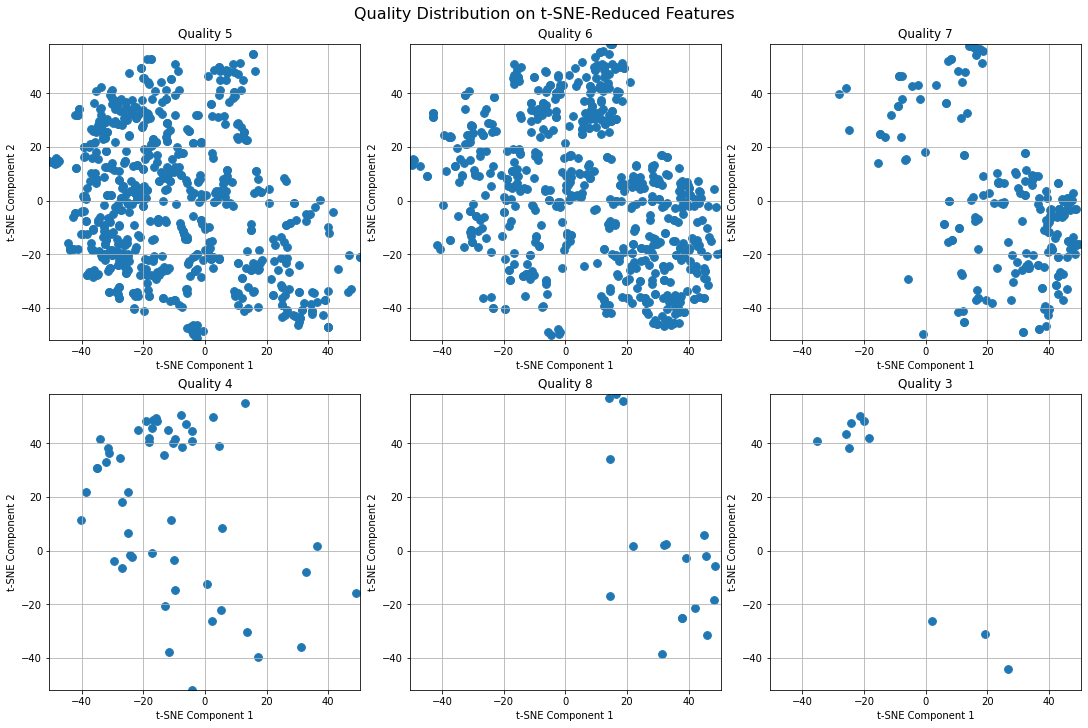

In [19]:
unique_qualities = features_tsne_df['quality'].unique()
num_plots = len(unique_qualities)
cols = 3  # Adjust the number of columns
rows = -(-num_plots // cols)  # Calculate the number of rows

# Determine consistent x and y axis limits
x_min, x_max = features_tsne_df['t-SNE1'].min(), features_tsne_df['t-SNE1'].max()
y_min, y_max = features_tsne_df['t-SNE2'].min(), features_tsne_df['t-SNE2'].max()

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows), constrained_layout=True)

for ax, quality in zip(axes.flatten(), unique_qualities):
    subset = features_tsne_df[features_tsne_df['quality'] == quality]
    ax.scatter(subset['t-SNE1'], subset['t-SNE2'], s=60)
    ax.set_title(f'Quality {quality}')
    ax.set_xlabel('t-SNE Component 1')
    ax.set_ylabel('t-SNE Component 2')
    ax.set_xlim(x_min, x_max)  # Set x-axis limits
    ax.set_ylim(y_min, y_max)  # Set y-axis limits
    ax.grid(True)

# Remove unused subplots if the number of qualities is less than the grid
for ax in axes.flatten()[len(unique_qualities):]:
    ax.axis('off')

plt.suptitle('Quality Distribution on t-SNE-Reduced Features', fontsize=16)
plt.show()

The analysis reveals that wines of higher quality prevail in clusters 3, 5, and 0, while clusters 1 and 2 are associated with lower quality wines. This conclusion was supported by the use of T-SNE for dimensionality reduction.

Next, we will identify the features associated with higher and lower quality wines. First of all let's visualize features' distributions across clusters.

In [20]:
# Add the cluster labels to the original features
features_with_clusters = features_as_is.copy()
features_with_clusters['Cluster'] = kmeans.labels_

# Melt the DataFrame for easier plotting with seaborn
features_melted = features_with_clusters.melt(id_vars=['Cluster'], var_name='Feature', value_name='Value')

<ipython-input-21-dfe479d941a2>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-21-dfe479d941a2>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-21-dfe479d941a2>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-21-dfe479d941a2>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-21-dfe479d941a2>:14: FutureWarning: 

Passing `pa

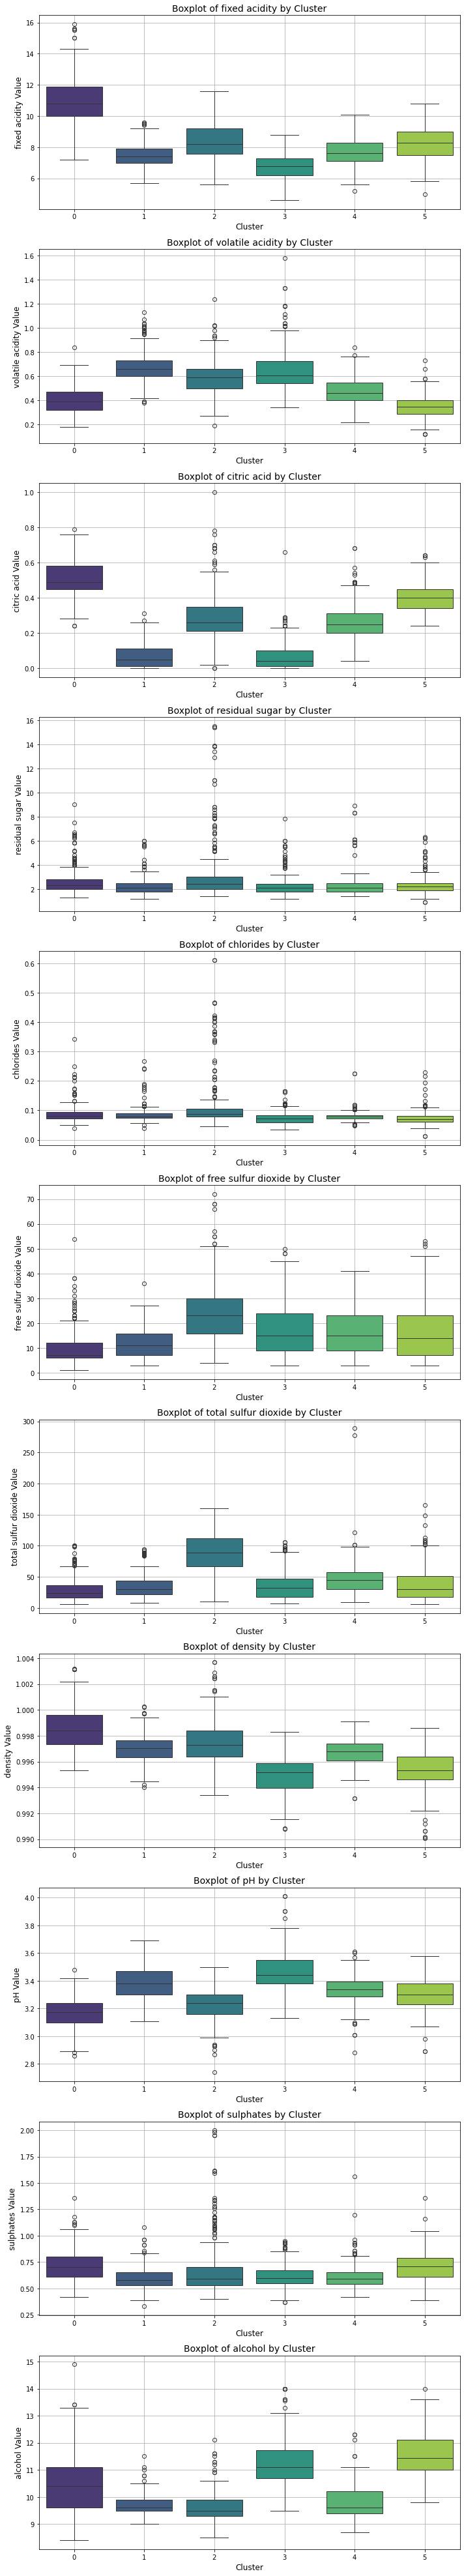

In [21]:
# Get the list of features
features_list = features_as_is.columns

# Create a subplot for each feature
num_features = len(features_list)
fig, axes = plt.subplots(num_features, 1, figsize=(10, 5 * num_features))

# If there's only one feature, 'axes' will not be a list, so we need to handle that case
if num_features == 1:
    axes = [axes]

# Plot a boxplot for each feature
for i, feature in enumerate(features_list):
    sns.boxplot(
        x='Cluster',
        y='Value',
        data=features_melted[features_melted['Feature'] == feature],
        palette='viridis',
        ax=axes[i]
    )
    axes[i].set_title(f'Boxplot of {feature} by Cluster', fontsize=14)
    axes[i].set_xlabel('Cluster', fontsize=12)
    axes[i].set_ylabel(f'{feature} Value', fontsize=12)
    axes[i].grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

We will identify the features with extreme values in each cluster and, finally, determine the features that are unique to each cluster.

In [22]:
# Add cluster labels to the dataset
cluster_labels = kmeans.labels_
features_df = pd.DataFrame(features, columns=["fixed acidity", "volatile acidity", "citric acid", 
                                              "residual sugar", "chlorides", "free sulfur dioxide", 
                                              "total sulfur dioxide", "density", "pH", 
                                              "sulphates", "alcohol"])
features_df['Cluster'] = cluster_labels

In [23]:
# Check if the cluster labels already exist in the dataset, and remove them if they do
if 'Cluster' in features_df.columns:
    features_df = features_df.drop(columns=['Cluster'])

# Add cluster labels to the dataset
cluster_labels = kmeans.labels_
features_df['Cluster'] = cluster_labels

# Calculate overall feature means
overall_means = features_df.iloc[:, :-1].mean()

# Calculate feature means for each cluster
cluster_means = features_df.groupby('Cluster').mean()

# Identify extreme features for each cluster
extreme_features = {}
for cluster in cluster_means.index:
    differences = cluster_means.loc[cluster] - overall_means
    extreme = differences[abs(differences) > differences.std()]
    extreme_features[cluster] = extreme.index.tolist()

# Display extreme features for each cluster
for cluster, features in extreme_features.items():
    print(f"Cluster {cluster}: Extreme features - {features}")


Cluster 0: Extreme features - ['fixed acidity', 'citric acid', 'density']
Cluster 1: Extreme features - ['volatile acidity', 'citric acid', 'alcohol']
Cluster 2: Extreme features - ['free sulfur dioxide', 'total sulfur dioxide', 'alcohol']
Cluster 3: Extreme features - ['fixed acidity', 'citric acid', 'density', 'pH', 'alcohol']
Cluster 4: Extreme features - ['fixed acidity', 'volatile acidity', 'alcohol']
Cluster 5: Extreme features - ['volatile acidity', 'citric acid', 'density', 'alcohol']


In [24]:
overall_means

fixed acidity           0.329171
volatile acidity        0.279329
citric acid             0.270976
residual sugar          0.112247
chlorides               0.125988
free sulfur dioxide     0.209506
total sulfur dioxide    0.142996
density                 0.490211
pH                      0.449695
sulphates               0.196496
alcohol                 0.311228
dtype: float64

In [25]:
# Find unique extreme features for each cluster
# Step 1: Identify all extreme features across clusters
from collections import Counter

# Collect all extreme features across clusters
all_extreme_features = [feature for features in extreme_features.values() for feature in features]

# Count how many clusters each feature appears in
feature_counts = Counter(all_extreme_features)

# Step 2: Filter features unique to each cluster
unique_features = {}

for cluster, features in extreme_features.items():
    # Keep features that are only extreme in this cluster
    unique_features[cluster] = [feature for feature in features if feature_counts[feature] == 1]

# Display unique features for each cluster
for cluster, features in unique_features.items():
    print(f"Cluster {cluster}: Unique features - {features}")


Cluster 0: Unique features - []
Cluster 1: Unique features - []
Cluster 2: Unique features - ['free sulfur dioxide', 'total sulfur dioxide']
Cluster 3: Unique features - ['pH']
Cluster 4: Unique features - []
Cluster 5: Unique features - []


Based on the clustering analysis of the wine quality dataset, we found some patterns between certain features and wine quality. Cluster 2, with higher levels of free sulfur dioxide and total sulfur dioxide, tends to have lower quality wines. These compounds, often used as preservatives, may negatively impact the taste.

On the other hand, Cluster 3 shows higher pH levels, which are linked to better wine quality. A higher pH, meaning lower acidity, can make the wine smoother and more balanced, which likely contributes to better quality ratings.

For other features, like fixed acidity, volatile acidity, citric acid, and density, there isn’t a clear connection to wine quality. While they may shape the wine’s profile, they don’t seem to drive significant quality differences in this dataset.

In conclusion, free sulfur dioxide, total sulfur dioxide, and pH stand out as important factors affecting wine quality. These insights could help improve wine production by focusing on the factors that enhance quality and reducing those that lower it.